<a href="https://colab.research.google.com/github/sohv/lung_cancer_prediction_resnet18/blob/main/notebooks/lung_cancer_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
from torch import nn
import torch
import numpy as np
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.models import resnet18
from torchvision.models import ResNet18_Weights

In [3]:
resnet18_model = resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 92.2MB/s]


'cpu'

In [4]:
resnet18_model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [5]:
data_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
     transforms.RandomHorizontalFlip(p=0.7),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
])

In [6]:
import os
from torchvision import datasets, transforms

train_data_path = "/content/drive/MyDrive/Colab Notebooks/lung_cancer_detection/train"
test_data_path = "/content/drive/MyDrive/Colab Notebooks/lung_cancer_detection/test"

train_data = datasets.ImageFolder(root=train_data_path, transform=data_transform)
test_data = datasets.ImageFolder(root=test_data_path, transform=data_transform)

print(f"Number of training samples: {len(train_data)}")
print(f"Number of test samples: {len(test_data)}")

Number of training samples: 675
Number of test samples: 315


In [7]:
train_data[np.random.randint(0 , len(train_data))]

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 0)

In [8]:
len(train_data)  , len(test_data)

(675, 315)

In [9]:
class_names = train_data.classes
class_names

['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa',
 'normal',
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']

In [10]:
class_dict = train_data.class_to_idx
class_dict

{'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 0,
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 1,
 'normal': 2,
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 3}

In [11]:
# change the key names
old_key1 = 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'
new_key1 = 'adenocarcinoma_left.lower.lobe'

old_key2 = 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa'
new_key2 = 'large.cell.carcinoma_left.hilum'

old_key3 = 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa'
new_key3 = 'squamous.cell.carcinoma_left.hilum'

# add new key-value pair
class_dict[new_key1] = class_dict[old_key1]
class_dict[new_key2] = class_dict[old_key2]
class_dict[new_key3] = class_dict[old_key3]

# remove old key-value pair
del class_dict[old_key1]
del class_dict[old_key2]
del class_dict[old_key3]

print(class_dict)

{'normal': 2, 'adenocarcinoma_left.lower.lobe': 0, 'large.cell.carcinoma_left.hilum': 1, 'squamous.cell.carcinoma_left.hilum': 3}


In [12]:
class_names[0]=new_key1
class_names[1]=new_key2
class_names[3]=new_key3
class_names

['adenocarcinoma_left.lower.lobe',
 'large.cell.carcinoma_left.hilum',
 'normal',
 'squamous.cell.carcinoma_left.hilum']

In [13]:
random_idx = torch.randint(0, len(train_data), size=(1,)).item()
img, label = train_data[random_idx][0], train_data[random_idx][1]

print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")
print(f"class name: {class_names[label]}")

Image tensor:
 tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
Image shape: torch.Size([3, 224, 224])
Image datatype: torch.float32
Image label: 3
Label datatype: <class 'int'>
class name: squamous.cell.carcinoma_left.hilum


Image permute: torch.Size([224, 224, 3]) 


Text(0.5, 1.0, 'normal')

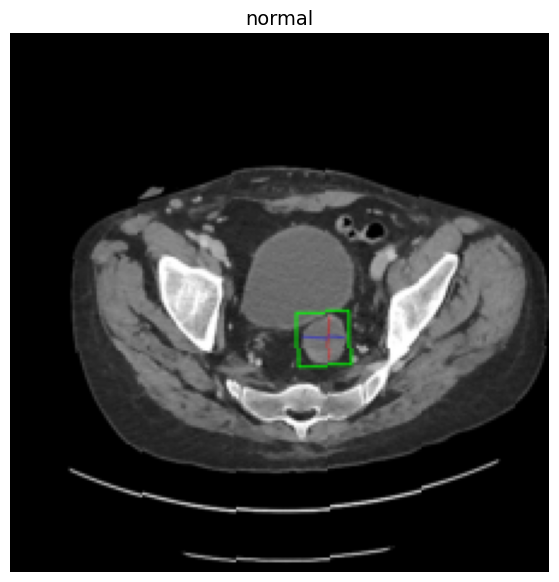

In [14]:
import random
from PIL import Image
import matplotlib.pyplot as plt
random_idx = torch.randint(0, len(train_data), size=(1,)).item()
img, label = train_data[random_idx][0], train_data[random_idx][1]


img_permute = img.permute(1, 2, 0)
print(f"Image permute: {img_permute.shape} ")
plt.figure(figsize=(12, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14)

**Data Loader**

In [15]:
BATCH_SIZE=32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7e85eb1c5c00>,
 <torch.utils.data.dataloader.DataLoader at 0x7e85eb1c7820>)

In [16]:
resnet18_model.fc = nn.Sequential (
    nn.Linear(512,512),
    nn.Dropout(0.2),
     nn.Linear(512,256),
    nn.Linear(256,len(class_names)),
)
resnet18_model.fc

Sequential(
  (0): Linear(in_features=512, out_features=512, bias=True)
  (1): Dropout(p=0.2, inplace=False)
  (2): Linear(in_features=512, out_features=256, bias=True)
  (3): Linear(in_features=256, out_features=4, bias=True)
)

In [17]:
resnet18_model.conv1 = nn.Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

In [18]:
from torch.optim import lr_scheduler
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet18_model.parameters(), lr=0.01)
optimizer = torch.optim.SGD(resnet18_model.parameters(), lr=0.01, momentum=0.9)

In [19]:
!pip install torchinfo

In [20]:
from torchinfo import summary
summary(resnet18_model, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [1, 4]                    --
├─Conv2d: 1-1                            [1, 64, 32, 32]           9,408
├─BatchNorm2d: 1-2                       [1, 64, 32, 32]           128
├─ReLU: 1-3                              [1, 64, 32, 32]           --
├─MaxPool2d: 1-4                         [1, 64, 16, 16]           --
├─Sequential: 1-5                        [1, 64, 16, 16]           --
│    └─BasicBlock: 2-1                   [1, 64, 16, 16]           --
│    │    └─Conv2d: 3-1                  [1, 64, 16, 16]           36,864
│    │    └─BatchNorm2d: 3-2             [1, 64, 16, 16]           128
│    │    └─ReLU: 3-3                    [1, 64, 16, 16]           --
│    │    └─Conv2d: 3-4                  [1, 64, 16, 16]           36,864
│    │    └─BatchNorm2d: 3-5             [1, 64, 16, 16]           128
│    │    └─ReLU: 3-6                    [1, 64, 16, 16]           --
│

In [21]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device=device):
  model.train()

  train_loss, train_acc = 0, 0

  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()
    optimizer.zero_grad() # optimizer
    loss.backward()
    optimizer.step()

    # Calculate accuracy metric
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)

  # get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [22]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
  model.eval()

  test_loss, test_acc = 0,  0

  with torch.inference_mode():
    for batch, (X, y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)
      test_pred_logits = model(X)
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  # get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

In [23]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader,
          test_dataloader,
          optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device=device):

  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)

    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  return results

In [24]:
NUM_EPOCHS = 20
model_0_results = train(model=resnet18_model,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.1004 | Train acc: 0.4938 | Test loss: 2.0071 | Test acc: 0.2969
Epoch: 1 | Train loss: 0.7835 | Train acc: 0.6548 | Test loss: 0.8953 | Test acc: 0.6177
Epoch: 2 | Train loss: 0.4166 | Train acc: 0.8272 | Test loss: 1.0042 | Test acc: 0.6455
Epoch: 3 | Train loss: 0.5072 | Train acc: 0.8201 | Test loss: 2.0413 | Test acc: 0.5062
Epoch: 4 | Train loss: 0.4113 | Train acc: 0.8613 | Test loss: 0.8020 | Test acc: 0.6976
Epoch: 5 | Train loss: 0.3947 | Train acc: 0.8542 | Test loss: 1.0974 | Test acc: 0.6154
Epoch: 6 | Train loss: 0.3081 | Train acc: 0.8949 | Test loss: 1.3925 | Test acc: 0.5432
Epoch: 7 | Train loss: 0.3205 | Train acc: 0.8982 | Test loss: 1.0471 | Test acc: 0.6106
Epoch: 8 | Train loss: 0.2513 | Train acc: 0.9091 | Test loss: 2.2383 | Test acc: 0.6705
Epoch: 9 | Train loss: 0.1701 | Train acc: 0.9394 | Test loss: 0.6111 | Test acc: 0.8088
Epoch: 10 | Train loss: 0.2247 | Train acc: 0.9290 | Test loss: 0.8463 | Test acc: 0.8340
Epoch: 11 | Train lo

In [25]:
torch.save(resnet18_model.state_dict(), "chest-ctscan_model.pth")

# Testing

In [26]:
import torch
import torchvision.models as models
import torch.nn as nn

# Load ResNet18 and customize it
resnet18_model = models.resnet18()
resnet18_model.fc = nn.Sequential(
    nn.Linear(512, 512),
    nn.Dropout(0.2),
    nn.Linear(512, 256),
    nn.Linear(256, 4)  # len(class_names) should be set to 4
)
resnet18_model.conv1 = nn.Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
resnet18_model.load_state_dict(torch.load("/content/chest-ctscan_model.pth"))
resnet18_model.eval()


<ipython-input-26-d752300627c6>:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  resnet18_model.load_state_dict(torch.load("/content/chest-ctscan_model.pth"))


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [33]:
from torchvision import transforms
from PIL import Image

# Define the required transformations
preprocess = transforms.Compose([
    transforms.Resize(size=(224, 224)),
     transforms.RandomHorizontalFlip(p=0.7),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
])
# Load and preprocess the image
image_path = "/content/drive/MyDrive/Colab Notebooks/lung_cancer_detection/test/squamous.cell.carcinoma/000111.png"
input_image = Image.open(image_path).convert("RGB")
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)  # Create a batch dimension

In [34]:
with torch.no_grad():
    output = resnet18_model(input_batch)
    _, predicted_class = torch.max(output, 1)  # Get the predicted class index

print(f"Predicted class: {predicted_class.item()}")

Predicted class: 3


In [43]:
import os
import torch
from torchvision import transforms
from PIL import Image

resnet18_model.eval()

preprocess = transforms.Compose([
    transforms.Resize(size=(224, 224)),
     transforms.RandomHorizontalFlip(p=0.7),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
])

test_directory = "/content/drive/MyDrive/Colab Notebooks/lung_cancer_detection/test/squamous.cell.carcinoma"

# list to store predictions
predictions = []

for filename in os.listdir(test_directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(test_directory, filename)
        input_image = Image.open(image_path).convert("RGB")
        input_tensor = preprocess(input_image)
        input_batch = input_tensor.unsqueeze(0)  # Create a batch dimension

        # make prediction
        with torch.no_grad():
            output = resnet18_model(input_batch)
            _, predicted_class = torch.max(output, 1)  # get the predicted class index

        predictions.append((filename, predicted_class.item()))

# Print all predictions
for filename, class_idx in predictions:
    print(f"Image: {filename}, Predicted Class: {class_idx}")

Image: 000115 (5).png, Predicted Class: 3
Image: 000115 (4).png, Predicted Class: 3
Image: 000112.png, Predicted Class: 3
Image: 000117 (5).png, Predicted Class: 0
Image: 000108 (6).png, Predicted Class: 3
Image: 000114 (2).png, Predicted Class: 2
Image: 000116 (5).png, Predicted Class: 3
Image: 000118 (4).png, Predicted Class: 3
Image: 000117 (2).png, Predicted Class: 3
Image: 000110 (2).png, Predicted Class: 3
Image: 000118 (3).png, Predicted Class: 3
Image: 000114 (3).png, Predicted Class: 3
Image: 000117 (3).png, Predicted Class: 3
Image: 000111.png, Predicted Class: 3
Image: 000119 (4).png, Predicted Class: 3
Image: 000153 (3).png, Predicted Class: 3
Image: 000134 (5).png, Predicted Class: 3
Image: 000129 (2).png, Predicted Class: 3
Image: 000159 (5).png, Predicted Class: 3
Image: 000151 (6).png, Predicted Class: 3
Image: 000139 (4).png, Predicted Class: 0
Image: 000142 (6).png, Predicted Class: 3
Image: 000124.png, Predicted Class: 3
Image: 000157 (6).png, Predicted Class: 3
Imag

In [44]:
import os
import torch
from torchvision import transforms
from PIL import Image
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Set your model to evaluation mode
resnet18_model.eval()

# Define your transformation function
data_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
     transforms.RandomHorizontalFlip(p=0.7),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
])

test_directory = "/content/drive/MyDrive/Colab Notebooks/lung_cancer_detection/test/squamous.cell.carcinoma"
true_labels = []
predictions = []

def get_true_label(filename):
    label = 3
    return label

# iterate through test images
for filename in os.listdir(test_directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(test_directory, filename)
        input_image = Image.open(image_path).convert("RGB")
        input_tensor = data_transform(input_image)
        input_batch = input_tensor.unsqueeze(0)  # create a batch dimension

        with torch.no_grad():
            output = resnet18_model(input_batch)
            _, predicted_class = torch.max(output, 1)  # get the predicted class index

        predictions.append(predicted_class.item())

        true_labels.append(get_true_label(filename))

# Calculate performance metrics
accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions, average='weighted')
recall = recall_score(true_labels, predictions, average='weighted')
f1 = f1_score(true_labels, predictions, average='weighted')
confusion_mat = confusion_matrix(true_labels, predictions)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(confusion_mat)


Accuracy: 0.8556
Precision: 1.0000
Recall: 0.8556
F1 Score: 0.9222
Confusion Matrix:
[[ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [ 3  5  5 77]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [45]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 5.4 MB/s eta 0:00:00


In [46]:
import streamlit as st
import torch
from torchvision import transforms
from PIL import Image
import torch.nn as nn
import torchvision.models as models

# Load the pre-trained model and modify it as per your configuration
@st.cache_resource  # Cache the model to avoid reloading on every interaction
def load_model():
    resnet18_model = models.resnet18()
    resnet18_model.fc = nn.Sequential(
        nn.Linear(512, 512),
        nn.Dropout(0.2),
        nn.Linear(512, 256),
        nn.Linear(256, 4)  # len(class_names) should be set to 4
    )
    resnet18_model.conv1 = nn.Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    resnet18_model.load_state_dict(torch.load("/content/chest-ctscan_model.pth"))
    resnet18_model.eval()
    return resnet18_model

# Load the model
resnet18_model = load_model()

# Define the transformation function
data_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.RandomHorizontalFlip(p=0.7),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
])

# Define the class labels
class_labels = {
    0: 'adenocarcinoma_left.lower.lobe',
    1: 'large.cell.carcinoma_left.hilum',
    2: 'normal',
    3: 'squamous.cell.carcinoma_left.hilum'
}

st.title("Lung Cancer Detection from CT Scan")
st.write("Upload a lung scan image, and the model will predict the type.")

# File uploader
uploaded_file = st.file_uploader("Choose a lung scan image...", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    # Open the image and apply transformations
    image = Image.open(uploaded_file).convert("RGB")
    st.image(image, caption="Uploaded Lung Scan", use_column_width=True)

    # Preprocess the image
    input_tensor = data_transform(image)
    input_batch = input_tensor.unsqueeze(0)  # Add batch dimension

    # Make prediction
    with torch.no_grad():
        output = resnet18_model(input_batch)
        _, predicted_class = torch.max(output, 1)
        predicted_label = class_labels[predicted_class.item()]

    st.write(f"**Prediction:** {predicted_label}")

2024-11-02 16:11:56.570 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-02 16:11:56.731 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-11-02 16:11:56.734 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-02 16:11:56.743 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
<ipython-input-46-973882e18a3e>:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for 